<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1">
                    <span class="toc-item-num">1&nbsp;&nbsp;
                    </span>Изучение данных из файла
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-2">
                    <span class="toc-item-num">2&nbsp;&nbsp;
                    </span>Приоритизация гипотез
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-3">
                    <span class="toc-item-num">3&nbsp;&nbsp;
                    </span>Анализ A/B-теста
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4">
                    <span class="toc-item-num">4&nbsp;&nbsp;
                    </span>Общий вывод
                </a>
            </span>
        </li>
    </ul>
</div>

# Исследование гипотез для увеличения выручки интернет-магазина

**Описание проекта**

Отдел маркетинга крупного интернет-магазина подготовил список гипотез для увеличения выручки.

**Цель исследования**

Приоритизация гипотез, запуск A/B-тестов и анализ результатов.

**Описание данных**  

Таблица hypothesis (набор гипотез):
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


Таблица orders (информация о заказах):  
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ


Таблица visitors (информация о пользователях):
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Изучение данных из файла

Импортируем библиотеки, которые пригодятся нам для работы.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Откроем файлы с данными `/datasets/hypothesis.csv`, `/datasets/orders.csv`, `/datasets/visitors.csv` и изучим общую информацию.

In [2]:
try:
    hypothesis, orders, visitors = (
        pd.read_csv('C:\\Anya\\аналитик_данных_яндекс\\Projects_github\\hypothesis.csv'),
        pd.read_csv('C:\\Anya\\аналитик_данных_яндекс\\Projects_github\\orders.csv'),
        pd.read_csv('C:\\Anya\\аналитик_данных_яндекс\\Projects_github\\visitors.csv'),
    )
except:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv'),
    )
    
display(hypothesis.head())
display(orders.head())
display(visitors.head())
display(hypothesis.info())
display(orders.info())
visitors.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Столбцы date в датафреймах `visitors` и `orders` имеют тип данных object. Заменим его на datetime.

In [3]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

display(orders.info())
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверим, нет ли у нас пользователей в таблице orders, которые попали в обе группы. Если есть, то удалим их.

In [4]:
# разделим датафрейм orders на две части по группам и смерджим обратно, используя visitorId
orders_a = orders.query('group == "A"')
orders_b = orders.query('group == "B"')
# используем тип объединения inner, чтобы в объединенный датасет попали только id, которые есть в обеих группах. 
orders_id = orders_a.merge(orders_b, on='visitorId', how='inner') 
 
orders_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 182
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   transactionId_x  183 non-null    int64         
 1   visitorId        183 non-null    int64         
 2   date_x           183 non-null    datetime64[ns]
 3   revenue_x        183 non-null    int64         
 4   group_x          183 non-null    object        
 5   transactionId_y  183 non-null    int64         
 6   date_y           183 non-null    datetime64[ns]
 7   revenue_y        183 non-null    int64         
 8   group_y          183 non-null    object        
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 14.3+ KB


In [5]:
# выберем уникальные id
id_list = orders_id['visitorId'].unique()
display(id_list)
len(id_list)

array([4069496402,  199603092, 3803269165, 2378935119,  237748145,
       4256040402, 2038680547, 1738359350, 2458001652, 3891541246,
       2716752286, 3656415546, 2686716486, 2954449915, 2927087541,
       3234906277,  457167155, 2579882178, 3957174400, 1648269707,
       2780786433,  818047933, 2044997962, 1959144690, 3202540741,
       1333886533,  351125977, 3951559397,  393266494, 3984495233,
       4120364173, 4266935830, 1230306981, 1294878855, 1614305549,
          8300375,  477780734, 1668030113, 3717692402, 3766097110,
       3941795274,  471551937, 1316129916, 1801183820, 1602967004,
       2587333274, 2600415354,  232979603, 3972127743, 1404934699,
        276558944, 3062433592, 2654030115, 3963646447, 4186807279,
       2712142231, 2949041841,  963407295], dtype=int64)

58

In [6]:
# отфильтруем исходный датафрем по id
orders = orders[~orders['visitorId'].isin(id_list)]
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


Проверим на дубликаты по датасетам:

In [7]:
display(visitors.duplicated().sum())
orders.duplicated().sum()

0

0

In [8]:
display(visitors.isna().sum())
orders.isna().sum()

date        0
group       0
visitors    0
dtype: int64

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Пропусков и дубликатов в датасетах нет.

Посмотрим, сколько групп в АВ-тесте:

In [9]:
display(orders['group'].unique())
visitors['group'].unique()

array(['B', 'A'], dtype=object)

array(['A', 'B'], dtype=object)

В АВ-тесте 2 группы.

Изучим временной интервал, узнаем даты начала и окончания теста:

In [10]:
min_data = orders['date'].min()
max_data = orders['date'].max()

print('Дата начала теста', min_data)
print('Дата окончания теста', max_data)

Дата начала теста 2019-08-01 00:00:00
Дата окончания теста 2019-08-31 00:00:00


Видим, что наш тест занял ровно месяц. Он начался 1 августа 2019 и закончился 31 августа 2019

Посмотрим динамику посетителей по дням по группам.

In [11]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


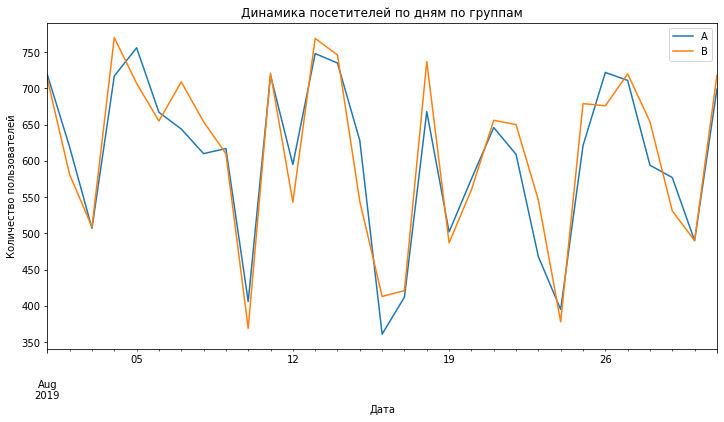

In [12]:
visitors.pivot_table(
    index='date', columns='group', values='visitors', aggfunc='sum').plot(figsize=(12, 6))
plt.ylabel('Количество пользователей')
plt.xlabel('Дата')
plt.title('Динамика посетителей по дням по группам')
plt.legend()
plt.show()

По графику видно, что для разных групп у нас примерно одинаковая динамика посещений.

## Приоритизация гипотез

В файле `hypothesis.csv` представлено 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

In [13]:
pd.options.display.max_colwidth = 130
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Существуют разные методы приоритизации гипотез. В данном задании мы будем использовать ICE и RICE. Метод RICE - это модификация ICE.
Фреймворк RICE состоит из четырёх компонент:
* Reach — количество пользователей, которых затронет изменение, которое мы хотим внести;
* Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
* Confidence — насколько мы уверены, что это изменение повлияет на пользователей именно так;
* Efforts — сколько стоит протестировать эту гипотезу.

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета и добавим новый столбец ICE в нашу таблицу `hypothesis`.

In [14]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis = hypothesis.sort_values(by='ICE', ascending=False)
hypothesis['ICE'] = hypothesis['ICE'].round(2)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Наиболее перспективные гипотезы по ICE - это 8, 0 и 7.

Применим фреймворк RICE для приоритизации гипотез. Также отсортируем их по убыванию приоритета и добавим новый столбец RICE в нашу таблицу `hypothesis`.

In [15]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis = hypothesis.sort_values(by='RICE', ascending=False)
hypothesis['RICE'] = hypothesis['RICE'].round(2)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Наиболее перспективными гипотезами остались 0 и 7 гипотезы, к ним добавилась 2.

**Вывод:**  

После применения фреймворка RICE 7 гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" оказалась на 1 месте, так как у нее наибольший параметр Reach. Он имеет максимальное значение 10. На 2 месте - 2 гипотеза "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" и на 3 месте - нулевая гипотеза "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей". 8 гипотеза "Запустить акцию, дающую скидку на товар в день рождения" спустилась с 1 на 5 место, так как у нее параметр Reach оказался наименьшим (1).

## Анализ A/B-теста

Был проведен A/B-тест и получены результаты, которые описаны в файлах `orders.csv` и `visitors.csv`. Проанализируем A/B-тест.

1) Построим график кумулятивной выручки по группам. Сделаем выводы и предположения. 

Сначала прочтём данные из файлов с результатами A/B-тестирования:

In [16]:
display(orders)
visitors

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами:
* date — дата;
* group — группа A/B-теста (A или B);
* orders — кумулятивное количество заказов на указанную дату в указанной группе;
* buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
* revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
* visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates():

In [17]:
datesGroups = orders[['date','group']].drop_duplicates()

Получим агрегированные кумулятивные по дням данные о заказах:

In [18]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [19]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим кумулятивные данные в одной таблице и присвоимм ее столбцам понятные названия.

In [20]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


Проверим, корректно ли был создан датафрейм cummulativeData. 

In [21]:
min_data = cumulativeData['date'].min()
max_data = cumulativeData['date'].max()

print('Дата начала теста', min_data)
print('Дата окончания теста', max_data)

Дата начала теста 2019-08-01 00:00:00
Дата окончания теста 2019-08-31 00:00:00


Минимальная и максимальная даты в этом датафрейме совпадают с минимальной и максимальной датой в исходных данных.

Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

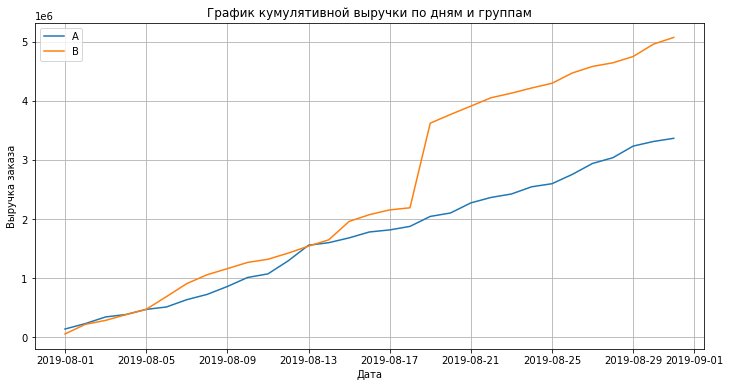

In [22]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 6))
plt.grid()

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('График кумулятивной выручки по дням и группам')
plt.xlabel('Дата')
plt.ylabel('Выручка заказа')
plt.show()

**Вывод:**

Выручка группы В резко растет с 18 по 19 августа примерн с 2 до 3.5 млн. Это может сигнализировать о всплесках числа заказов либо о появлении очень дорогих заказов в выборке. Затем с 19 августа продолжается более плавный рост графика до 5 млн. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы проанализируем в следующем уроке

Выручка группы А растет почти равномерно на протяжении всего теста. Максимум достигается в районе 3.5 млн.

2) Построим график кумулятивного среднего чека по группам. Для этого разделим кумулятивную выручку на кумулятивное число заказов:

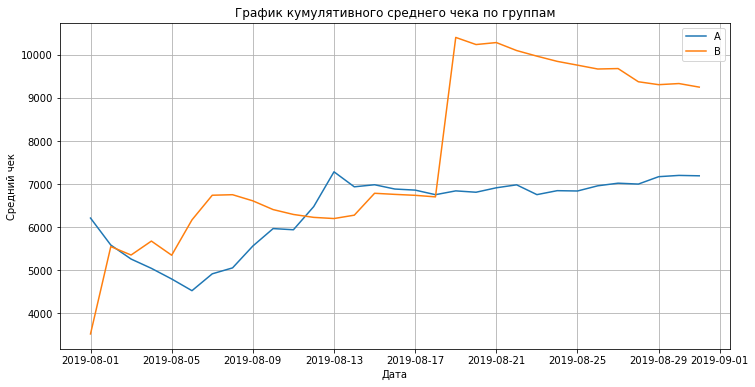

In [23]:
plt.figure(figsize=(12, 6))
plt.grid()

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()

**Вывод:**  
Для группы В наблюдаются резкие взлеты, которые чередуются более плавными падениями. Самый резкий подъем происходил на 18 на 19 августа. Средний чек увеличился с 7000 до 10500.
Для группы А наблюдается сначала снижение среднего чека почти до 4500, далее рост до 13 августа (7000) и снова небольшое снижение среднего чека.  
В конце теста уровень среднего чека для группы В находится в районе 9000, а для группы А вблизи 7000.

3) Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

Сначала собирем данные в одном датафрейме:

In [24]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Поcтроим отношение средних чеков. На график добавим ось Х.

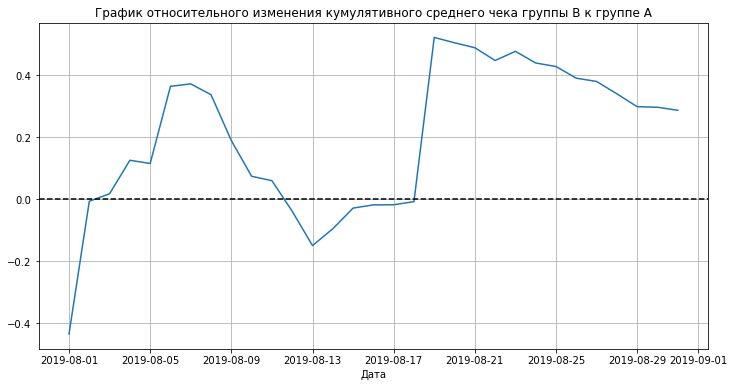

In [25]:
plt.figure(figsize=(12, 6))

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')

plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.show()

**Вывод:**  
Показатель группы А - это линия в нуле. В нескольких точках график различия между сегментами резко скачет. Значит, где-то в данных имеются большие аномалии или выбросы.  
На промежутке с 1 по 12 августа и примерно с 18 августа и до конца теста синяя линия выше нуля, значит группа В относительно группы А ведет себя лучше. Но есть небольшой участок с 12 по 18 августа, когда результаты группы В хуже.

4) Аналогично проанализируем график кумулятивной конверсии по группам.

Сначала посчитаем кумулятивную конверсию:

In [26]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

Отделим данные по группам А и В и построим графики:

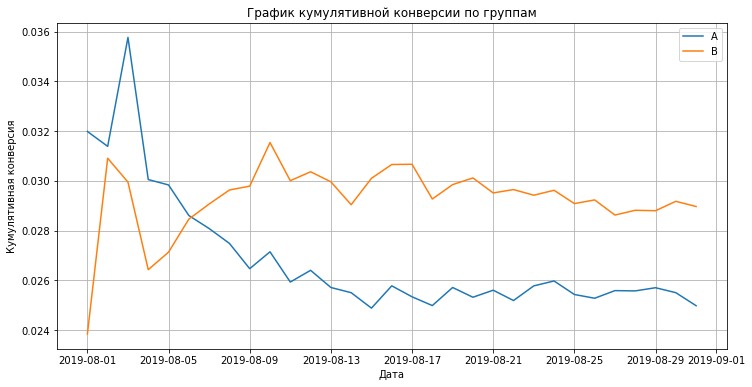

In [27]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(12, 6))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.legend()
plt.grid()
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.show()

**Вывод:**  
В самом начале у группы А наблюдался резкий рост (пик в районе 0.036), далее график пошел на спад и к концу теста остановился в районе 0.026. У группы В тоже был резкий пик, но пониже, чем у А (в области 0.031), далее резкий спад примерно до 0.026 и снова рост примерно до 0.032. Конверсия группы В лучше, чем А.

5) Построим график относительного изменения кумулятивной конверсии группы B к группе A.

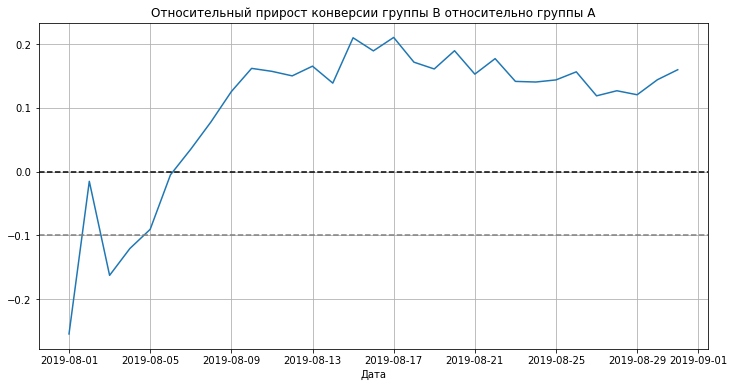

In [28]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 6))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.grid()
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xlabel('Дата')
plt.show()

**Вывод:**  
В целом конверсия группы В лучше, чем А.

6) Построим график количества заказов по пользователям.

Сначала найдем число заказов по пользователям. Для этого создадим датафрейм orderByUsers c двумя столбцами: 'userId' и 'orders'. Отсортируем его по убыванию количества заказов пользователей.

In [29]:
orderByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
orderByUsers.columns = ['userId', 'orders']
orderByUsers = orderByUsers.sort_values(by='orders', ascending=False)
orderByUsers

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
...,...,...
331,1438226485,1
332,1452540367,1
333,1455323168,1
334,1455861274,1


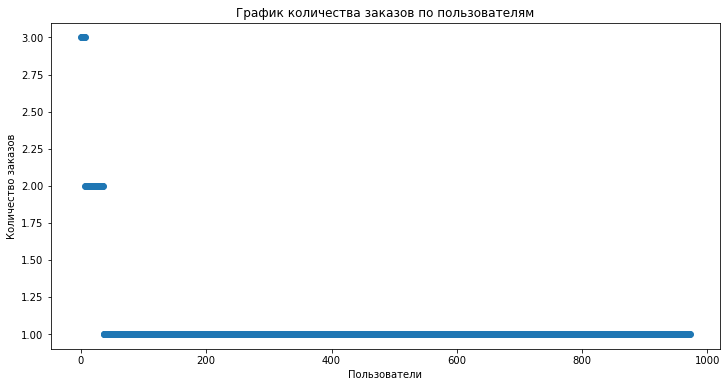

In [30]:
x_values = pd.Series(range(0, len(orderByUsers)))
plt.figure(figsize=(12, 6))
plt.scatter(x_values, orderByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

Пользователей, заказавших более двух раз, совсем мало. Они вполне могут быть аномальными.

7) Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и определим границу для аномальных пользователей. 

In [31]:
np.percentile(orderByUsers['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей совершали больше 1 заказа. И не более 1% пользователей – больше двух заказов. Будем считать количество заказов больше 2 аномальными.

8) Построим график стоимостей заказов.

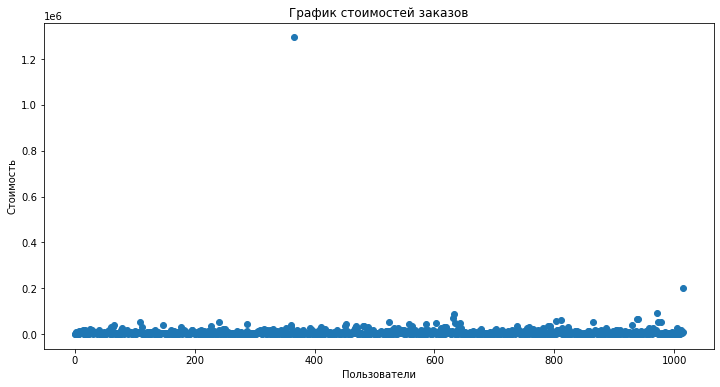

In [32]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12, 6))
plt.scatter(x_values, orders['revenue'])

plt.title('График стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость')
plt.show()

Большинство заказов находится в области ниже 200 000. Есть 1 выброс в районе 1.3 млн. Увеличим масштаб, чтобы лучше увидеть данные в области по оси y от 0 до 250 000.

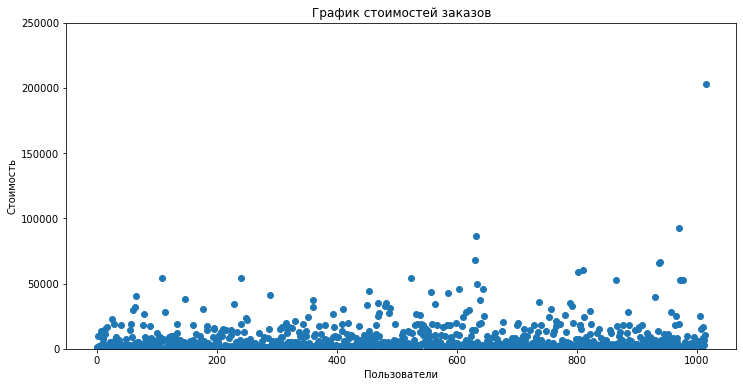

In [33]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12, 6))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 250000)
plt.title('График стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость')
plt.show()

Теперь нагляднее видно, что большинство значений сосредоточено в области до 50 000. Заказов стоимостью больше 50 000 не так уж много. Есть еще один очевидный выброс в районе 200000.

9) Посчитаем 95-й и 99-й перцентили стоимости заказов и выберем границу для определения аномальных заказов.

In [34]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более, чем у 5% заказов чек дороже 26785 рублей. И не более, чем у 1% заказов – дороже 53904 рублей. Будем считать стоимость заказов больше 50 000 аномальной.

10) Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Сформулируем гипотезы:

Нулевая: различий в конверсии между группами нет. 
Альтернативная: различия в конверсии между группами есть.

In [35]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [36]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [37]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [38]:
p_value = "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])
print('p_value =', p_value)

dif_mean = "{0:.5f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1)
print('Различие в средних =', dif_mean)

p_value = 0.01102
Различие в средних = 0.15980


Вывод: p-value = 0.01102 меньше 0.05, значит, нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост среднего группы В к конверсии группы А равен 15.9%

11) Посчитаем статистическую значимость различия средних чеков между группами.

Сформулируем гипотезы:

Нулевая: различий в среднем чеке между группами нет. 
Альтернативная: различия в среднем чеке между группами есть.

In [39]:
p_value = '{0:.5f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
print('p_value =', p_value)

dif_mean = '{0:.5f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)
print('Различие в средних =', dif_mean)

p_value = 0.82949
Различие в средних = 0.28660


p-value = 0.82949 больше значительно больше 0.05, значит, что статистически значимых различий в среднем чеке между группами нет. Кроме того, относительное различие среднего чека между сегментами 28.6%, наблюдаемые различия не являются значимыми пи таком уровне значимости, следовательно, они были получены случайно.

12) Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 

Приступаем к подготовке очищенных от аномалий данных.  

95-й и 99-й перцентили средних чеков равны 26 785 и 53 904 рублям.  
95-й и 99-й перцентили числа заказов на одного пользователя равны 1 и 2 заказам на пользователя.

Примем за аномальных пользователей тех, кто совершил больше 2 или совершил заказ на сумму свыше 50 000 рублей.

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 50 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers, удалим дубликаты и отсортируем по возрастанию.

In [40]:
np.percentile(orderByUsers['orders'], 99)

2.0

In [41]:
np.percentile(orders['revenue'], 99)

53904.0

In [42]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(orderByUsers['orders'], 99)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(orderByUsers['orders'], 99)]['userId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers

1099     148427295
33       249864742
58       611059232
949      887908475
744      888512513
1103    1164614297
1136    1307669133
425     1920142716
1196    2108080724
211     2108163459
347     2742574263
310     2988190573
409     3908431265
416     3967698036
940     4003628586
743     4133034833
dtype: int64

Теперь у нас есть множество аномальных пользователей. После их удаления посчитаем статистическую значимость, чтобы выяснить, есть ли существенные различия между группами с очищенными данными.

Создадим переменные sampleAFiltered и sampleBFiltered, в которых сохраним очищенные данные о заказах.

In [43]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

display('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
'{0:.5f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'0.00702'

'0.18921'

p-value = 0.00561 меньше 0.05. Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент В значительно лучше сегмента А.

13) Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [44]:
display(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

display(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)


'0.788'

'-0.032'

p-value = 0.939 снова больше 0.05, значит, различий в среднем чеке между группами нет. После удаления выбросов в данных стало меньше шума, относительное различие в выручке между сегментами стало 1.1%.

## Общий вывод:

* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
* По сырым данным нет статистически значимого различия по среднему чеку между группами, как и по отфильтрованным данным. При этом после удаления выбросов в данных  относительное различие в выручке между сегментами снизилось с 28.6% до 1.1%.
* График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту.
* График различия среднего чека колеблется: он-то и позволил вам найти аномалии. Сделать из этого графика определённые выводы нельзя.
Исходя из фактов выше следует остановить тест, признать его успешным и перейти к проверке следующей гипотезы.